# 1. Multiple variance Analysis

Atsuya Kobayashi

---

- 各変数の分布を確認する
- RIDGE L2ノルム正則化
- LASSO L1ノルム正則化

In [33]:
%matplotlib inline

In [36]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import os

# import ipywidgets

In [37]:
if os.name == "nt":
    # on Windows
    font = {"family":"Yu Mincho"}

font = {"family":"IPAGothic"}
    
mpl.rc('font', **font)

In [38]:
plt.style.use('ggplot')

In [39]:
ssdse = pd.read_csv("SSDSE.csv", header=1)

In [40]:
pd.set_option('display.max_columns', 100)
ssdse.head()

,地域コード,都道府県,市区町村,人口総数,人口総数（男）,人口総数（女）,日本人人口,日本人人口（男）,日本人人口（女）,１５歳未満人口,１５歳未満人口（男）,１５歳未満人口（女）,１５〜６４歳人口,１５〜６４歳人口（男）,１５〜６４歳人口（女）,６５歳以上人口,６５歳以上人口（男）,６５歳以上人口（女）,７５歳以上人口,７５歳以上人口（男）,７５歳以上人口（女）,外国人人口,出生数,死亡数,転入者数,転出者数,世帯数,一般世帯数,一般世帯人員数,核家族世帯数,単独世帯数,６５歳以上の世帯員のいる核家族世帯数,高齢夫婦のみの世帯数,高齢単身世帯数（６５歳以上の者１人）,婚姻件数,離婚件数,総面積（北方地域及び竹島を除く）,可住地面積,事業所総数,事業所数（農業，林業）,事業所数（建設業）,事業所数（製造業）,事業所数（電気・ガス・熱供給・水道業）,事業所数（情報通信業）,事業所数（運輸業，郵便業）,事業所数（卸売業，小売業）,事業所数（金融業，保険業）,事業所数（不動産業，物品賃貸業）,事業所数（学術研究，専門・技術サービス業）,事業所数（宿泊業，飲食サービス業）,...,従業者数（情報通信業）,従業者数（運輸業，郵便業）,従業者数（卸売業，小売業）,従業者数（金融業，保険業）,従業者数（不動産業，物品賃貸業）,従業者数（学術研究，専門・技術サービス業）,従業者数（宿泊業，飲食サービス業）,従業者数（生活関連サービス業，娯楽業）,従業者数（教育，学習支援業）,従業者数（医療，福祉）,従業者数（複合サービス事業）,従業者数（サービス業（他に分類されないもの））,従業者数（公務（他に分類されるものを除く））,第１次産業従業者数,第２次産業従業者数,第３次産業従業者数,経常収支比率（市町村財政）,実質公債費比率（市町村財政）,歳入決算総額（市町村財政）,地方税（市町村財政）,歳出決算総額（市町村財政）,民生費（市町村財政）,土木費（市町村財政）,教育費（市町村財政）,災害復旧費（市町村財政）,幼稚園数,幼稚園在園者数,小学校数,小学校教員数,小学校児童数,中学校数,中学校教員数,中学校生徒数,高等学校数,高等学校生徒数,公民館数,図書館数,総人口（非水洗化人口＋水洗化人口）,非水洗化人口,小売店数,飲食店数,大型小売店数,一般病院数,一般診療所数,歯科診療所数,医師数,歯科医師数,薬剤師数,保育所等数,保育所等在所児数
0,R01100,北海道,札幌市,1952356,910614,1041742,1937785,903535,1034250,221013,112743,108270,1235516,590111,645405,483534,201313,282221,225299,84053,141246,8820,14021,18504,118336,109199,921837,920415,1899980,493644,375242,178246,98660,104650,10495,4096,112126,43898,76604,103,6701,2611,68,1459,1697,18585,1420,8822,4139,10168,...,31952,47454,195399,24911,34186,30961,87304,42136,46826,128742,7785,99791,29737,1345,99922,811574,91.6,4.9,885032369,285914071,877817401,387909355,122018222,75353766,0,123,21511,205,4843,89616,108,3042,46721,53,44774,1,11,1941078,7169,11498,9124,377,179,1317,1237,6418,2118,5015,258,25037
1,R01202,北海道,函館市,265979,120376,145603,264537,119819,144718,27131,13912,13219,152154,72223,79931,85931,33839,52092,42686,14949,27737,771,1532,3637,8718,9791,123950,123651,255149,66690,48247,29540,16258,20148,1172,563,67787,12334,13795,24,1224,612,17,100,275,3590,278,976,440,2216,...,1270,6897,24804,3124,3174,2877,13084,6446,5599,20957,1362,10227,4725,493,18551,105171,87.2,7.7,140294201,32096591,137520941,59128199,12767988,14834123,0,21,2396,48,763,11022,30,517,6249,15,7502,3,1,269079,32549,2689,1872,43,28,215,131,777,185,672,45,3494
2,R01203,北海道,小樽市,121924,54985,66939,121415,54722,66693,11171,5661,5510,65317,31183,34134,45240,18020,27220,22804,8063,14741,411,512,1856,3121,3970,55466,55299,116724,31709,19911,15984,8950,10585,391,197,24383,8009,6090,2,422,461,12,26,217,1786,99,208,143,939,...,121,3321,12988,918,802,989,5301,2381,3161,9878,548,3101,1818,119,10937,45594,93.3,10.6,58910972,13322414,56913539,24802064,6353807,4270950,0,14,1036,21,362,4548,14,263,2728,8,3457,0,1,122088,4073,1373,821,19,12,84,79,301,106,359,21,1394
3,R01204,北海道,旭川市,339605,156402,183203,335678,154716,180962,37173,18938,18235,191423,90649,100774,106444,44410,62034,51691,19833,31858,613,2280,4060,10282,11029,155747,155218,326243,88393,57488,38167,23059,22400,1573,720,74766,35194,15201,76,1437,779,13,110,367,3795,331,1233,496,2100,...,1157,8183,33338,3671,3566,3448,12815,6542,8340,27297,1879,13044,7088,799,22461,131090,92.3,7.1,158551128,39358806,157272163,71562459,18929525,12385413,133,29,2757,55,1213,15875,28,658,8602,14,9199,28,5,345566,6634,2639,1840,74,36,243,179,1280,253,826,62,5405
4,R01205,北海道,室蘭市,88564,43143,45421,88203,42935,45268,9185,4647,4538,49005,25831,23174,30118,12457,17661,14850,5688,9162,297,503,1220,2999,3771,43616,43536,86029,23014,18486,10954,6773,7295,378,127,8088,4327,4423,1,453,230,9,36,122,1039,100,279,147,748,...,582,2600,7498,983,876,1621,3430,1553,2421,7110,409,3975,1469,24,12540,34851,93.0,9.5,46451973,13408552,45582620,17193862,5267335,4642622,2372,11,1112,15,289,3629,8,162,2101,6,2907,0,1,88889,2854,764,669,7,6,53,46,284,63,191,10,986


## 正規性を見よう

**コロモゴロフスミルノフ検定(Kolmogorov–Smirnov test)**でええか？

- [scipy.stats.kstest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)

分布の一致を図れるわけではないっぽいので，考える。

データのNが市町村で，各変数はすべてカウントデータで人口に依存する（マルチコ？）ので正直きれいな正規分布では無いと思うどちらかというと指数分布に近い。（地方の大量にある過疎市町村）



- とりあえす分布をみてみる

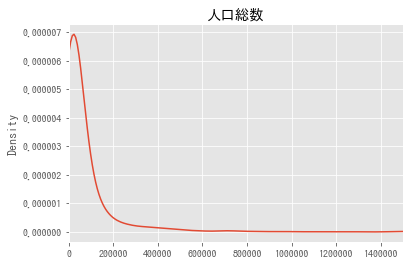

In [41]:
ssdse["人口総数"].plot(kind="kde", xlim=(0, 1500000), title="人口総数")

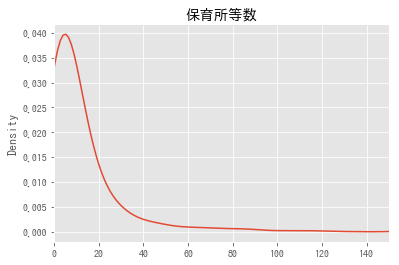

In [42]:
ssdse["保育所等数"].plot(kind="kde", xlim=(0, 150), title="保育所等数")

In [43]:
from scipy import stats

for var_name in tqdm(ssdse.columns.values[3:]):
    _stats, p = stats.kstest(ssdse[var_name], "norm", alternative='two-sided', mode='approx')

    if p > 0.05:
        print("Var: {} is not subject to Norm Dist, p={}, stats={}"
              .format(var_name, _stats, p))


## GLM (Generalized Linear Model)

## [LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

> class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

In [8]:
import sklearn.linear_model


## [RIDGE](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

> class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)